# Ordinary Kriging Example

In [2]:
# First we will create a 2D dataset together with the associated x, y grids
import numpy as np
import pykrige.kriging_tools as kt
from pykrige import OrdinaryKriging
import matplotlib.pyplot as plt


In [6]:
data = np.array(
    [   [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],])
print(type(data))

<class 'numpy.ndarray'>


In [7]:
data.shape

(5, 3)

In [9]:
gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

In [10]:
gridx

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [11]:
gridy

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [13]:
# Create the ordinary kriging object. Required inputs are the X-coordinates of the data points, the Y-coordinates of the data points, and the Z-values of the data points.
OK = OrdinaryKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
)

In [18]:
print(OK)

In [15]:
# Creates the kriged grid and the variance grid.
z, ss = OK.execute("grid", gridx, gridy)

In [20]:
z

masked_array(
  data=[[0.44243502318239214, 0.4600930026796312, 0.48677783416289977,
         0.5242839728091135, 0.5826773564279746, 0.6675723108302898,
         0.7620512011204208, 0.8552925548628071, 0.9430497678050291,
         1.023187939028162, 1.0946125446173116],
        [0.44546200237916284, 0.4627755254249189, 0.49123000817954066,
         0.5258400717641009, 0.5795484583522867, 0.6894396738958439,
         0.7980312976452972, 0.9006988715149924, 0.9951008365617126,
         1.079539338162373, 1.153091685732461],
        [0.456767859581752, 0.47570977301135936, 0.5152091408727115,
         0.5633696804103181, 0.6341512271967447, 0.7400134608541513,
         0.8528837354904472, 0.96098340043625, 1.0599441374303664,
         1.1471586339367559, 1.221317163263006],
        [0.4874447605759912, 0.5115588127198105, 0.5588711354322344,
         0.622441117376079, 0.7066806640237212, 0.8111710290752915,
         0.9244416338918076, 1.035536606246961, 1.1376089173894666,
         1.2

In [21]:
ss

masked_array(
  data=[[0.2592348462151437, 0.21697173215927967, 0.185620050093106,
         0.1507003616085125, 0.14098079771101837, 0.1934962343941475,
         0.27091057749162145, 0.3485939641380801, 0.42182740911446853,
         0.491497286160281, 0.5599388590592125],
        [0.16857907506423003, 0.13433839128069075, 0.12282338387603807,
         0.07928152497428616, 0.033412197372541357, 0.1334894328066719,
         0.2245208620240181, 0.30321912032969683, 0.37293023486324334,
         0.43771179023565937, 0.5016155100223008],
        [0.0851332102506222, 0.05734400180642253, 0.09882011510861151,
         0.09207956894947218, 0.08318287521329792, 0.14137090557413878,
         0.21305277711097995, 0.2779203059340609, 0.33579995490873243,
         0.3905481098685688, 0.4468698688128306],
        [0.0919146496762858, 0.07010101583644003, 0.11140934135535291,
         0.12986229606731414, 0.14347812569342042, 0.17561920857304442,
         0.21951485895469935, 0.2632407706365101, 0.30

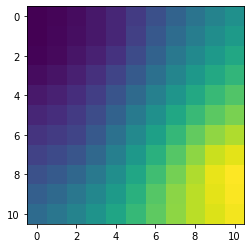

In [22]:
# Writes the kriged grid to an ASCII grid file and plot it.
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
plt.imshow(z)
plt.show()

# Universal Kriging Example

In this example we apply a regional linear trend to the kriging system.

In [23]:
from pykrige  import UniversalKriging

In [24]:
UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)

In [25]:
UK 

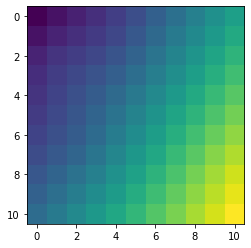

In [26]:
z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

# Three-Dimensional Kriging Example

In [27]:
from pykrige import OrdinaryKriging3D
from pykrige  import UniversalKriging3D

In [28]:
data = np.array(
    [
        [0.1, 0.1, 0.3, 0.9],
        [0.2, 0.1, 0.4, 0.8],
        [0.1, 0.3, 0.1, 0.9],
        [0.5, 0.4, 0.4, 0.5],
        [0.3, 0.3, 0.2, 0.7],
    ]
)

In [29]:
gridx = np.arange(0.0, 0.6, 0.05)
gridy = np.arange(0.0, 0.6, 0.01)
gridz = np.arange(0.0, 0.6, 0.1)


In [37]:
ok3d = OrdinaryKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3], variogram_model="linear"
)
k3d1, ss3d = ok3d.execute("grid", gridx, gridy, gridz)

In [38]:
uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)
k3d2, ss3d = uk3d.execute("grid", gridx, gridy, gridz)

In [39]:
zg, yg, xg = np.meshgrid(gridz, gridy, gridx, indexing="ij")
uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["specified"],
    specified_drift=[data[:, 0], data[:, 1], data[:, 2]],
)
k3d3, ss3d = uk3d.execute(
    "grid", gridx, gridy, gridz, specified_drift_arrays=[xg, yg, zg]
)

In [40]:
func = lambda x, y, z: x
uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["functional"],
    functional_drift=[func],
)
k3d4, ss3d = uk3d.execute("grid", gridx, gridy, gridz)

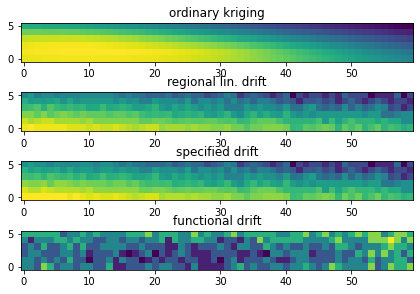

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.imshow(k3d1[:, :, 0], origin="lower")
ax1.set_title("ordinary kriging")
ax2.imshow(k3d2[:, :, 0], origin="lower")
ax2.set_title("regional lin. drift")
ax3.imshow(k3d3[:, :, 0], origin="lower")
ax3.set_title("specified drift")
ax4.imshow(k3d4[:, :, 0], origin="lower")
ax4.set_title("functional drift")
plt.tight_layout()
plt.show()